# Pythonを使った機械学習：Classification（分類）

# 機械学習（Machine Learning）とは？
与えられたデータ群から規則性を見つけ出して，人間の学習能力をコンピュータ上で再現すること

## 教師あり学習
人間が正解データ（教師データ）を事前に与えて，それに基づいて学習を行う手法．<br>
Classification（分類）やRegresion（回帰）など

### Classification: Suport Vector Machine（SVM）
複数のデータ群を分類する境界線を作り出すことで，与えられたデータがどの分類に属するのかがわかる<br>
境界線の引き方にも色々と種類がある<br>
![](./images/svms.png) <br>
http://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html

### Classification: K-Nearest Neighbor Algorithm(KNN法）
教師データ上に与えられたデータを配置した時，教師データに近いk個のデータの割合で与えられたデータの割合を決める<br>
![](./images/knn.png)

## 教師なし学習
人間から正解データを付与されず，アルゴリズムによってコンピュータが答え（分類）を計算する手法<br>
Clustering（クラスタリング）など

## 半教師あり学習
教師ありとなしのいいとこ取りみたいな感じ

# ここでは，Classificationを扱う

# 特徴量（Features）とは？
分類のためには特徴量が必要<br>
特徴量＝コンピュータが理解できるデータ上の違い<br>
この違いが分類の決めてになる

## Irisデータ
有名なデータセットの一つで，Iris（あやめ）の花の萼片（Sepal）と花びら（Petal）の長さ（Length）と幅（Width）が三種類分（Setosa・Versicolour・Virginica）格納されている<br>
![](./images/iris.jpg)
<br>
データの種類は次元と言われる<br>
つまり，Irisデータの場合四種類のデータなので，「四次元」のデータということになる

# Scikit-Learnとは？
![](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)
Pythonで提供されている機械学習のライブラリ<br>
http://scikit-learn.org/stable/index.html
<br>
importするときは，sklearnとして扱われる<br>
anacondaに標準インストールされている<br>
<br>
anacondaを使っていない場合は
* pip install scikit-learn

<br>で導入可能

# では，実際にやってみましょう

In [1]:
# 必要な環境をimportする

import numpy as np

In [2]:
from sklearn import datasets

#  irisデータを読み込む
iris = datasets.load_iris()
print(iris)

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [3]:
# irisデータを学習データとテストデータに分割する
# データの奇数番目を学習データに，偶数番目をテストデータにする

x_train = iris.data[range(0, len(iris.data), 2)]
y_train = iris.target[range(0, len(iris.data), 2)]

x_test = iris.data[range(1, len(iris.data), 2)]
y_test = iris.target[range(1, len(iris.data), 2)]

In [4]:
from sklearn.svm import SVC

#　学習の用意
svm = SVC(probability=True, decision_function_shape="ovr")

# 分類器の設定を確認する
svm.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [5]:
# 学習器に教師データを与えて学習させる
# 引数は特徴量，教師データ（ラベル）
svm.fit(x_train, y_train)

# 分類器にテストデータを分類させる
predict = svm.predict(x_test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2])

## 作成した分類器を評価する
### 適合率（Precion）と再現率（Recall）とは？
#### 適合率
検索結果の中で，どの程度が正解に含まれるか
#### 再現率
正解の中で，どの程度が検索にヒットするのか
![](http://cdn-ak.f.st-hatena.com/images/fotolife/Z/Zellij/20120214/20120214075315.png)
<br>http://f.hatena.ne.jp/Zellij/20120214075315<br>

# わからん！
ということで，混合行列
### 混合行列（Confusion Matrix）とは？
テストデータがどのラベルにどれだけ分類されたかを表す行列<br>
![](./images/cm1.png)<br>
![](./images/cm2.png)<br>
![](./images/cm3.png)<br>
![](./images/cm4.png)<br>

### F値（F-measure）とは？
適合率と再現率は負の相関関係にあることが多い＝トレードオフの関係にある<br>
ということで，分類器の制度を適合率と再現率の調和平均＝F値で評価する<br>
$
F-measure = \displaystyle　\frac{2\dot precion \times recall}{precion + recall}
$<br>


In [6]:
# 先ほどの分類器の混合行列を表示する
from sklearn.metrics import confusion_matrix

# 引数は，正解データと予測結果
matrix = confusion_matrix(y_test, predict)
matrix

array([[25,  0,  0],
       [ 0, 24,  1],
       [ 0,  4, 21]])

In [7]:
# F値を計算する
from sklearn.metrics import classification_report

# 引数は，正解データと予測結果
# オプションとして，target_namesを利用可能
report = classification_report(y_test, predict, target_names=iris.target_names)
print(report)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        25
 versicolor       0.86      0.96      0.91        25
  virginica       0.95      0.84      0.89        25

avg / total       0.94      0.93      0.93        75



### K-分割交差検定（K-fold Cross-Validation）による分類器の検証
データ数があまり多くなくて，学習データとテストデータにわけると数が足りない場合などに利用される
![](./images/kfcv.png)

### グリッドサーチとは？
機械学習には，学習の際のパラメータが存在し，そのパラメータをチューニングして最良な分類器を作成する<br>
以下では，k分割交差検定法とグリッドサーチが同時に実装されている関数を用いる

In [8]:
# グリッドサーチのために，パラメータの選択肢を決定する
param_svm = [
{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel':['poly'], 'degree': [2, 3, 4, 5], }
 ] 

from sklearn.model_selection import GridSearchCV

# グリッドサーチ&交差検定用の学習器を設定する
# 引数に，用いる分類器，パラメータ選択肢
# オプションとして，cvはk分割交差検定の回数（つまり，k）
# オプションとして，n_jobsは並列スレッド数
from multiprocessing import cpu_count
job = cpu_count() -1
svm_cv = GridSearchCV(SVC(probability=True, decision_function_shape="ovr"), param_svm, cv=10, n_jobs=job)

# 交差検定を用いたグリッドサーチを行う
# 引数に，特徴量と正解データ
svm_cv.fit(iris.data, iris.target)

import pandas as pd
df = pd.DataFrame(svm_cv.cv_results_)
print(df)

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0        0.003272         0.001308         0.973333          0.988148       1   
1        0.002560         0.000476         0.980000          0.980000      10   
2        0.003118         0.000501         0.973333          0.981481     100   
3        0.011820         0.000682         0.980000          0.986667    1000   
4        0.008885         0.000581         0.906667          0.921481       1   
5        0.010018         0.000755         0.906667          0.921481       1   
6        0.006084         0.000592         0.933333          0.945185      10   
7        0.008402         0.000597         0.906667          0.921481      10   
8        0.003332         0.000525         0.980000          0.979259     100   
9        0.005177         0.000942         0.933333          0.945185     100   
10       0.002790         0.000490         0.980000          0.980000    1000   
11       0.003461         0.

In [9]:
print("best estimator: %s" %svm_cv.best_estimator_)
print("best socre: %s" %svm_cv.best_score_)
print("best param: %s" %svm_cv.best_params_)
print("best score's index: %s" %svm_cv.best_index_)

best estimator: SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
best socre: 0.98
best param: {'kernel': 'linear', 'C': 10}
best score's index: 1


### 得られた最良パラメータでもう一度学習してF値を見てみる

In [10]:
svm_best = SVC(C=10, kernel="linear", probability=True, decision_function_shape="ovr")

svm_best.fit(x_train, y_train)

predict_best = svm_best.predict(x_test)
matrix_best = confusion_matrix(y_test, predict_best)
report_best = classification_report(y_test, predict_best, target_names=iris.target_names)

print(predict_best)
print(matrix_best)
print(report_best)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2]
[[25  0  0]
 [ 0 24  1]
 [ 0  1 24]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        25
 versicolor       0.96      0.96      0.96        25
  virginica       0.96      0.96      0.96        25

avg / total       0.97      0.97      0.97        75



#### ↑F値が0.93から0.97に上昇

### KNN法でirisデータを分類してみる

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_param = [
    {'n_neighbors': [1, 2, 3, 4, 5],'weights': ['uniform', 'distance'], }
]

knn_cv = GridSearchCV(KNeighborsClassifier(), knn_param, cv=10, n_jobs=job)
knn_cv.fit(iris.data, iris.target)

df_knn = pd.DataFrame(knn_cv.cv_results_)
print(df_knn)

   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.001294         0.002078         0.960000          1.000000   
1       0.000680         0.001313         0.960000          1.000000   
2       0.000709         0.001215         0.953333          0.978519   
3       0.000733         0.001389         0.960000          1.000000   
4       0.000610         0.001051         0.966667          0.960741   
5       0.000796         0.001484         0.966667          1.000000   
6       0.000711         0.001261         0.966667          0.963704   
7       0.000690         0.001222         0.966667          1.000000   
8       0.000617         0.001066         0.966667          0.968889   
9       0.001273         0.001404         0.966667          1.000000   

  param_n_neighbors param_weights                                     params  \
0                 1       uniform   {'weights': 'uniform', 'n_neighbors': 1}   
1                 1      distance  {'weights': 

In [14]:
print("best estimator: %s" %knn_cv.best_estimator_)
print("best socre: %s" %knn_cv.best_score_)
print("best param: %s" %knn_cv.best_params_)
print("best score's index: %s" %knn_cv.best_index_)

best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
best socre: 0.966666666667
best param: {'weights': 'uniform', 'n_neighbors': 3}
best score's index: 4


In [15]:
knn = KNeighborsClassifier(n_neighbors=3, weights="uniform")
knn.fit(x_train, y_train)

predict_knn = knn.predict(x_test)
matrix_knn = confusion_matrix(y_test, predict_knn)
report_knn = classification_report(y_test, predict_knn, target_names=iris.target_names)

print(predict_knn)
print(matrix_knn)
print(report_knn)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]
[[25  0  0]
 [ 0 23  2]
 [ 0  1 24]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        25
 versicolor       0.96      0.92      0.94        25
  virginica       0.92      0.96      0.94        25

avg / total       0.96      0.96      0.96        75



### SVMでdigitsデータを分類してみる
（おそらく）数字の手書き画像データ

In [16]:
digits = datasets.load_digits()
print(digits)

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

#### とりあえず表示してみる

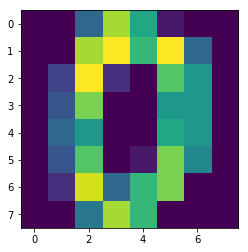

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(digits.images[0])

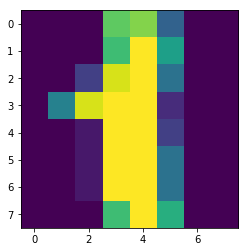

In [17]:
plt.imshow(digits.images[1])

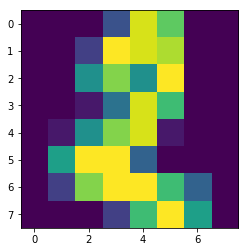

In [18]:
plt.imshow(digits.images[2])

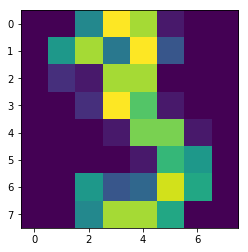

In [19]:
plt.imshow(digits.images[3])

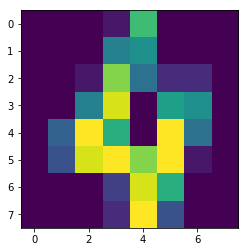

In [20]:
plt.imshow(digits.images[4])

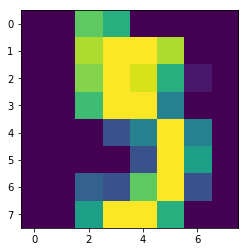

In [21]:
plt.imshow(digits.images[5])

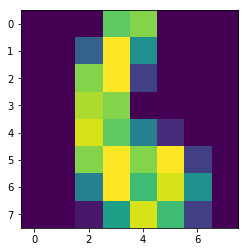

In [22]:
plt.imshow(digits.images[6])

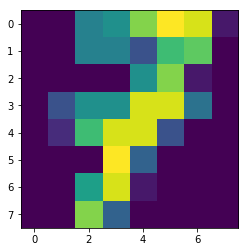

In [23]:
plt.imshow(digits.images[7])

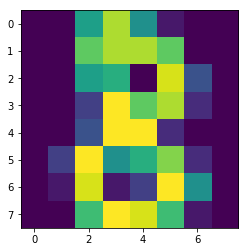

In [24]:
plt.imshow(digits.images[8])

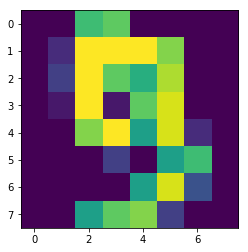

In [25]:
plt.imshow(digits.images[9])

#### 最良パラメータをチューニングして，その評価を行う

In [19]:
digits_cv = GridSearchCV(SVC(probability=True, decision_function_shape="ovr"), param_svm, cv=10, n_jobs=job)
digits_cv.fit(digits.data, digits.target)

df_digits = pd.DataFrame(digits_cv.cv_results_)
print(df_digits)

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0        0.426283         0.009931         0.961046          1.000000       1   
1        0.442262         0.011539         0.961046          1.000000      10   
2        0.396747         0.009436         0.961046          1.000000     100   
3        0.403054         0.008936         0.961046          1.000000    1000   
4        1.010304         0.022444         0.978854          0.998887       1   
5        0.867185         0.026060         0.954925          0.981883       1   
6        1.002598         0.022435         0.981080          1.000000      10   
7        0.505829         0.014482         0.969393          0.997836      10   
8        1.006637         0.019954         0.981080          1.000000     100   
9        0.469150         0.013731         0.971619          1.000000     100   
10       1.003917         0.020371         0.981080          1.000000    1000   
11       0.476784         0.

In [20]:
print("best estimator: %s" %digits_cv.best_estimator_)
print("best socre: %s" %digits_cv.best_score_)
print("best param: %s" %digits_cv.best_params_)
print("best score's index: %s" %digits_cv.best_index_)

best estimator: SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
best socre: 0.981079577073
best param: {'kernel': 'rbf', 'gamma': 0.001, 'C': 10}
best score's index: 6


#### 最良パラメータに基づいて分類器を作成してF値で評価する

In [21]:
svm_digits = SVC(C=10, kernel="rbf", gamma=0.001, probability=True, decision_function_shape="ovr")


xd_train = digits.data[range(0, len(digits.data), 2)]
yd_train = digits.target[range(0, len(digits.data), 2)]

xd_test = digits.data[range(1, len(digits.data), 2)]
yd_test = digits.target[range(1, len(digits.data), 2)]

svm_digits.fit(xd_train, yd_train)

predict_digits = svm_digits.predict(xd_test)
matrix_digits = confusion_matrix(yd_test, predict_digits)
report_digits = classification_report(yd_test, predict_digits)

print(predict_digits)
print(matrix_digits)
print(report_digits)

[1 3 9 7 9 1 3 5 7 9 1 3 5 7 9 9 5 5 5 9 4 7 3 1 0 2 8 0 2 3 7 3 6 6 7 5 9
 2 2 0 7 3 1 4 3 3 1 6 4 1 0 3 9 1 5 4 2 2 5 9 4 8 9 8 1 1 3 5 7 9 1 3 5 7
 9 1 3 5 7 9 9 5 5 9 9 4 7 3 1 0 2 8 0 2 3 7 3 6 6 9 5 9 2 2 0 7 3 1 3 3 1
 6 4 1 0 3 9 1 5 4 2 2 5 4 8 9 8 8 1 3 5 7 9 1 3 5 7 9 1 3 5 7 9 9 5 5 9 9
 4 7 3 1 0 2 8 0 2 3 7 3 6 6 9 5 9 2 2 0 7 3 1 4 3 3 1 6 4 1 0 3 9 1 5 4 2
 2 5 9 4 8 9 8 3 1 3 5 7 9 1 3 5 7 9 1 3 5 7 9 9 5 9 9 9 4 7 3 1 0 2 8 0 2
 3 7 3 6 6 9 5 9 2 2 0 7 3 1 4 3 3 1 6 4 1 0 3 9 1 5 4 2 2 5 9 4 8 9 8 8 1
 3 5 7 9 1 3 5 7 9 1 3 5 7 9 8 5 5 9 9 4 7 3 1 0 2 8 0 2 3 7 3 6 6 9 5 9 2
 2 0 7 3 1 4 3 3 1 6 4 1 0 3 9 1 5 4 2 2 5 9 4 8 9 8 8 1 3 5 7 9 1 3 5 7 9
 1 3 5 7 9 9 5 5 9 9 4 7 3 1 0 2 8 0 2 3 7 3 6 6 9 5 9 2 2 0 7 3 1 4 3 3 1
 6 4 1 0 3 9 1 5 4 2 2 5 9 4 8 9 8 8 1 3 5 7 9 1 3 5 7 9 1 3 5 7 9 9 5 5 9
 9 4 7 3 1 0 2 8 0 2 3 7 3 6 6 9 5 9 2 2 0 7 3 1 4 3 3 1 6 4 1 0 3 9 1 5 4
 2 2 5 9 4 8 9 8 8 2 4 6 8 0 2 4 6 8 0 2 4 6 8 0 5 6 0 8 8 1 7 5 2 8 0 2 3
 7 3 6 6 9 5 9 2 2 0 7 3 